<a href="https://colab.research.google.com/github/ankitadhara28/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
# Data Collection and processing
gold_data = pd.read_csv("/content/gld_price_data.csv") #loading the dataset to a pandas dataframe
gold_data.head() # printing first 5 rows of the dataframe

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print the last five rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [29]:
gold_data['Date']=pd.to_datetime(gold_data['Date']) #converted date from object to datetime

In [22]:
# getting information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [23]:
# chceking no of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [24]:
# statistical info about the data
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [27]:
# finding correlation of the data
gold_corr = gold_data.corr()

<Axes: >

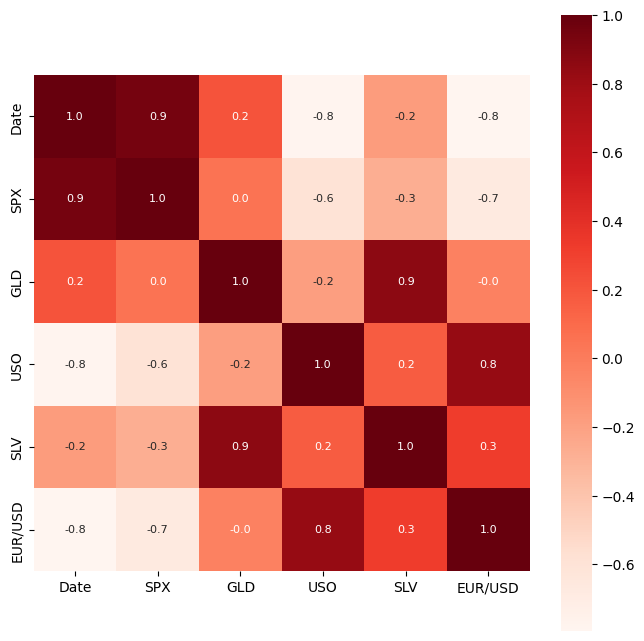

In [31]:
# contsruction of heap map for understanding correlation
plt.figure(figsize=(8,8))
sns.heatmap(gold_corr,cbar=True,square = True, fmt='.1f',annot = True,annot_kws={'size':8}, cmap='Reds')

In [33]:
# correlation values of GLD
print(gold_corr['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-1771736525.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

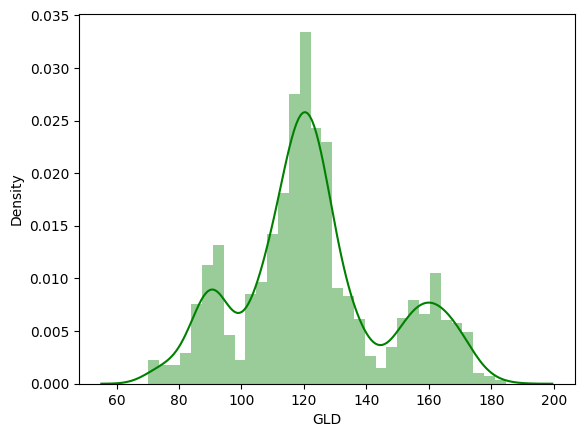

In [34]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

In [36]:
# Splitting the target and the feaures
x = gold_data.drop(['Date','GLD'],axis = 1)
y = gold_data['GLD']
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [37]:
# splitting into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2)

In [38]:
# model training , for that e will be using random forest regressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
# model evaluation,prediction on test data
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)


[168.27199935  81.77149996 115.9069999  127.75600081 120.71930094
 154.86309767 150.08659742 126.15520032 117.46579898 126.03120023
 116.70910071 171.90630096 141.82119922 167.96849896 115.1594002
 117.57580036 137.61520448 169.99940028 158.57610414 154.69540053
 155.1380999  125.51919991 177.04919993 157.10960329 125.27010047
  93.7715      77.37730041 120.5329002  119.016999   167.51420038
  88.32010049 125.36050007  90.98790062 117.68830048 120.98479917
 136.30580134 115.59360098 114.83510082 147.0034001  107.17540078
 103.99950228  87.15259791 126.4013005  117.74400035 154.85169832
 119.75529984 108.33839992 108.05189808  93.23970076 127.11759762
  74.52170061 113.58509935 121.35289996 111.22689894 118.8456991
 120.93269963 158.76990074 168.74340056 147.03629651  85.92169857
  94.43930011  86.81859872  90.62070027 119.07770062 126.4560009
 127.74759991 169.96739927 122.33709956 117.34379901  98.37920051
 168.22320061 143.25459828 132.06050277 121.25830231 120.69679936
 119.78900101

In [40]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.989109846202833


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

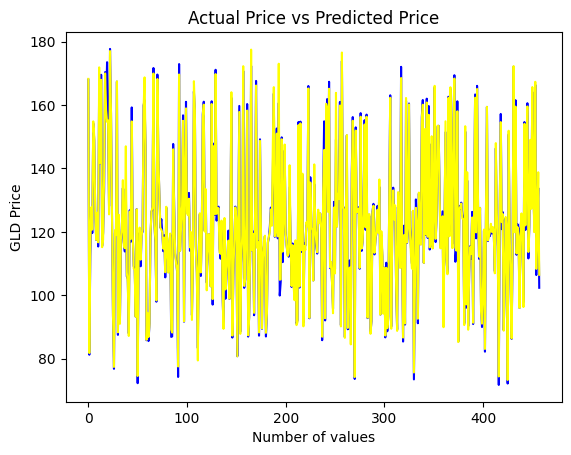

In [44]:
# compare the actual and predicted values in a plot
y_test = list(y_test)
plt.plot(y_test,color='blue',label='Actual Value')
plt.xlabel("Number of values")
plt.plot(test_data_prediction,color='yellow',label='Predicted Value')
plt.ylabel("GLD Price")
plt.title('Actual Price vs Predicted Price')

# Gold Price Prediction using Random Forest Regressor

## Project Overview
This project aims to predict the price of Gold (GLD) using historical data of various financial indicators. A Random Forest Regressor model is employed for this prediction task, and its performance is evaluated using the R-squared metric.

## Dataset
The dataset used is `gld_price_data.csv`, which contains historical data for:
- `Date`: Date of the observation.
- `SPX`: S&P 500 Index.
- `GLD`: Gold Price (Target Variable).
- `USO`: United States Oil Fund ETF.
- `SLV`: iShares Silver Trust ETF.
- `EUR/USD`: Euro to US Dollar Exchange Rate.

## Dependencies
The following Python libraries are required to run this notebook:
- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scikit-learn` (sklearn)

## Methodology
The project follows these steps:

### 1. Data Collection and Initial Processing
- The `gld_price_data.csv` file is loaded into a pandas DataFrame.
- Basic data exploration is performed to understand the dataset's structure, including checking the first/last rows, dimensions (`shape`), data types (`info()`), and descriptive statistics (`describe()`).
- Missing values are checked using `isnull().sum()`.
- The 'Date' column is converted to datetime objects.

### 2. Exploratory Data Analysis (EDA)
- **Correlation Analysis**: A correlation matrix is computed for all numerical features, and a heatmap is visualized using `seaborn` to understand the relationships between variables, especially with GLD prices.
- **GLD Price Distribution**: The distribution of the target variable (`GLD` price) is visualized using a `distplot` to understand its spread and characteristics.

### 3. Data Preprocessing
- **Feature and Target Separation**: The dataset is split into features (`X`) and the target variable (`y`). The 'Date' and 'GLD' columns are dropped from the features (`X`).
- **Train-Test Split**: The data is further split into training and testing sets using `train_test_split` with a test size of 20% and `random_state=2` for reproducibility.

### 4. Model Training
- A `RandomForestRegressor` model is initialized with `n_estimators=100`.
- The model is trained on the training data (`x_train`, `y_train`).

### 5. Model Evaluation
- **Prediction**: The trained model makes predictions on the test set (`x_test`).
- **R-squared Score**: The R-squared error is calculated to assess the model's accuracy, comparing the predicted values with the actual `y_test` values.
- **Visualization**: A plot comparing the actual GLD prices (`y_test`) and the predicted GLD prices (`test_data_prediction`) is generated to visually inspect the model's performance.

## Results
The Random Forest Regressor model achieved an R-squared score of **0.9891**, indicating a very strong fit and high accuracy in predicting gold prices based on the given features. The plot comparing actual vs. predicted values further illustrates the model's ability to closely follow the actual price trends.